# Simplest AVI implementation in 2D
9.22.2020

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

import pandas as pd, numpy as np, matplotlib.pyplot as plt

#automate the boring stuff
# from IPython import utils
import time, os, sys, re, math
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
    
from numba import njit
#load the libraries
from lib import *
#TODO: fix 
from lib.explicit import *
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


# (~deprecated) unnecessarily object oriented AVI integration of classical spring-chain-loop in 2D space
- DONE: write/test a dVdx force function for a given Hookean edge

In [4]:
#TODO(later): define hash and encode x,y position only
# node_hash_list = list(range(N))
# edge_hash_list


In [5]:
class Node(object):
    r"""A node for a graph. value is a tuple of length 2 here.
    Node.value is an iterable of values.
    Node.a is the index/hashcode of the node."""
    def __init__(self, value, a, mass=1., **kwargs):
        self.value  = value
        self.a      = a
        self.kwargs = kwargs
        self.mass = mass
#         self.node_children_list = []
    def __repr__(self):
        return f"{self.value}"
#     def add_child_node(self, other):
#         self.node_children_list.append(other)
#         return self
    def get_mass(self):
        return float(self.mass)

class Edge(Node):
    r"""an an element here is a directed edge from node1 to node2.  an edge extends a node class, as it is a simplex."""
    def __init__(self, node1, node2):#needed??, **kwargs):
        self.node1 = node1
        self.node2 = node2
        self.a1 = node2.a
        self.a2 = node1.a
        self.X1 = np.array(node1.value)
        self.X2 = np.array(node2.value)
        self.x1 = np.array(node1.value)
        self.x2 = np.array(node2.value)
        self.mass = self.get_mass()
        assert ( self.X1.shape == self.x1.shape )
        assert ( self.X1.shape == self.X2.shape )
        assert ( self.x2.shape == self.x1.shape )
        
    def __repr__(self):
        return f"{(self.node1,self.node2)}"
    
    def get_mean_value(self):
        return [q1/2+q2/2 for q1,q2 in zip(self.node1.value,self.node2.value)]
    
    def get_mass(self):
        return self.node1.mass/2+self.node2.mass/2
    
    def spring_force(self, k=1.):
        D  = self.X2-self.X1
        d  = self.x2-self.x1
        x  = np.linalg.norm(d)
        x0 = np.linalg.norm(D)
        hat= d/x
        return -1.*k * (x-x0) * hat
    
    def spring_potential(self, k=1.):
        D  = self.X2-self.X1
        d  = self.x2-self.x1
        x  = np.linalg.norm(d)
        x0 = np.linalg.norm(D)
        hat= d/x
        return 0.5*k * ( (x-x0) ** 2 )


In [6]:
assert (Edge(Node([5], a=2), Node([6], a=3) ) .spring_potential()==0)
assert (Edge(Node([5], a=2), Node([6], a=3) ) .spring_force()==0)

In [7]:
Edge(Node([5], a=3), Node([6], a=3))

([5], [6])

In [8]:
#initialize mesh in a ground state position
import math
pi = math.pi
r  = 1 # length unit 
def points_in_circum(r,n=100):
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

q = np.array(points_in_circum(r,n=100))[:-1]
p = q*0. #initialize velocity to zero
N = q.shape[0] #apparent number of points

In [282]:
# # represent the discretized circle as a list of edges
# # mesh = edge_list
# edge_list = []
# for j in range(N-1):
#     edge_list.append( Edge(Node(q[j], a=j), Node(q[j+1], a=j+1)))
# # impose periodic boundary conditions with one line
# edge_list.append( Edge(Node(q[-1], a=N), Node(q[0], a=0)))

In [10]:
#DONE: visual check that edge_list makes sense

In [281]:
# def update_edge_configuration(edge_list, q):
#     '''update edge_list with nodal positions.'''
#     N = q.shape[0] #apparent number of points
#     for edge in edge_list: 
#         a1 = edge.a1
#         a2 = edge.a2
#         edge.x1 = q[a1]
#         edge.x2 = q[a2]
#         return True

In [280]:
# np.array(nodes)
# edge_list
# q #the array of coordinates

# q_t0, qtf = explicit(t0=0, tf=1, mesh=mesh, **kwargs)
# # update_edge_configuration(edge_list, q)

In [279]:
# # @njit
# def _compute_dVdx(K, t0, edge_element_a):
#     pass
    


In [278]:
# #pass args to explicit and fix errors!
# kwargs = {}
# explicit(t0=0, tf=1, mesh=Mesh(), **kwargs)

### (~deprecated) Mesh environment 

In [191]:
class Mesh(object):
    def __init__(self, iterable_elements, iterable_nodes, **kwargs):
        '''initial_displacement is an object comparable to iterable_nodes.
        sets motion at rest.'''
        self.iterable_elements = iterable_elements
        self.iterable_nodes    = iterable_nodes
        # compute_x1
        self.x1 = np.array(self.iterable_nodes)
        initial_displacement = 0.*x1
        self.x32dot = -1 * initial_displacement
    def __repr__(self):
        mass = self.get_sum_mass()
        return f"Mesh of {self.get_num_elements():d} Elements with total mass = {mass:f}."
    def set_velocity(self, displacement):
        self.x32dot = -1 * displacement
    def get_sum_mass(self):
        return sum ( [s.mass for s in self.iterable_elements] )
    def get_num_elements(self):
        return len ( [s.mass for s in self.iterable_elements] )
    def set_sum_mass(self, mass_total=1.):
        '''define masses of nodes so the whole mesh has unit mass'''
        N = selfget_num_elements()
        m = mass_total/N
        M = m + 0.*q[:,0]
        

In [277]:
# #mash out a simplest mesh
# iterable_nodes    = np.array(q)
# iterable_elements = edge_list
# Mesh(iterable_elements, iterable_nodes, **kwargs)
    
    
# #the problem is that iterable_nodes has no mass property, 
# # since it is a numpy array.
# #TODO: use iterable_elements.masses to get the required 
# #     mass in get_sum_mass()

In [178]:
# def _compute_time(K, t0, stepsize, num_steps):
# 	"""compute the time steps of the element"""
# 	tf = t0 + num_steps*stepsize
# 	return np.arange(t0,tf+stepsize,stepsize)

In [276]:
# # _compute_time(K=None, t0=0, stepsize=1, num_steps=10)
# q = np.array(points_in_circum(r,n=100))[:-1]  #initialize 100 points on a circle
# v = q*0. #initialize nodal velocity to zero
# N = q.shape[0] #apparent number of points
# M_total = 1.   #total mass units
# M = v + M_total/N  #matrix of nodal masses
# nodes = list(range(N))

In [275]:
# #input data
# M = mesh.M # tuple of node masses
# # elements = edge_list#mesh.elements
# nodes = mesh.nodes

# #initialization of nodes, elements and queue of times
# q   = list(nodes)
# v   = list(nodes)
# tau = list(nodes)

# for a in nodes:
# 	x    = mesh.x1[a]
# 	xdot = mesh.x32dot[a]
# 	q[a] = x
# 	v[a] = xdot
# 	tau[a] = t0  # initialize node time to t0


In [274]:
# # mesh.nodes should be a list of indices for the np.array's mesh.x1 and such
# nodes = range(len(iterable_nodes))

In [273]:
# # mesh.elements should be a list of indices for the np.array's mesh.x1 and such
# elements = range(len(iterable_elements))

In [272]:
# # TODO:# @njit
# def _compute_dVdx(K,a,qK,t):
#     '''compute the gradient of the potential energy at time t.
#     qK is the mean position of the nodes'''

#     pass



In [271]:
# #DONE: replace K.nodes with the list of indicies of nodes that element K has
# elements = range(len(iterable_elements))
# a = list(elements)
# b = list(elements)
# for K in elements:
#     a[K] = a_mat[K][0]
#     b[K] = a_mat[K][1]
# # a[K] is the nodal_index_1 of the K^th element
# # b[K] is the nodal_index_2 of the K^th element

In [230]:
from lib.explicit import *

In [269]:
# def compute_nodal_spring_forces(x,X,a,b,k=1.):
#     '''compute the net forces on each nodal position
#     x = current nodal configuration array
#     X = ideally precomputed initial nodal configuration array
#     '''
#     F  = 0.*x.copy()  #nodal forces
#     for K in list(elements):
        
#         ia = a[K]
#         ib = b[K]
#         x1 = x[ia]
#         X1 = X[ia]
#         x2 = x[ib]
#         X2 = X[ib]
#         F = spring_force(X1,X2,x1,x2, k=k)
#         F[ia] = F[ia] + F
#         F[ib] = F[ib] - F
#     return F
    

In [267]:
# x  = q.copy() 
# X  = q.copy() 
# F = compute_nodal_spring_forces(x,X,k=1.)

In [270]:
# #DONE: compute the spring force
# a_lst = [[j,j+1] for j in range(N-1)]
# a_lst.append([int(N)-1,0])
# a_mat = np.array(a_lst)
# # edge_list = []
# # for j in range(N-1):
# #     edge_list.append( Edge(Node(q[j], a=j), Node(q[j+1], a=j+1)))


# Note from reading on AVI's

Consider the local nodal energy of node $a$ to be $E_a(t_i)$ at time $t_i$ to be the Hamiltonian for a particle moving in a local potential, $V(q_a, Xi_a)$, where $Xi_a$ is the collection of nodal positions sharing an edge with node $a$.

# the simplest synchronous implementation of a variational integrator
DONE: test/develop a onestep method using explicit.py on a simplest use case a 1D chain of springs with their volume conserved

## initialize a ball and spring model of a circle in 2D at rest and at equilibrium

In [5]:
#initialize mesh in a ground state position
pi = math.pi
r  = 1 # length unit 
def points_in_circum(r,n=100):
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

In [7]:
#a list of elements, where each entry is a list of nodal indexes corresponding to each element
edge_list = []
for j in range(N-1):
    edge_list.append( (j,j+1) )
#impose periodic boundary conditions
edge_list.append((N-1,0))

elements = np.array(edge_list)

In [8]:
#define equilibrium configuration explicitely
N = 20
X = np.array(points_in_circum(r,n=N))[:-1]  #initialize 100 points on a circle
V = X*0. #initialize nodal velocity to zero

# N = Q.shape[0] #apparent number of points
M_total = 1.   #total mass units
#create nodal mass matrix
M = V[:,0] + M_total/N
#note the matrix of equal nodal masses is equiv. here to giving half of the mass of each edge to each of its nodes, for uniform mass-length density
NK = elements.shape[0]

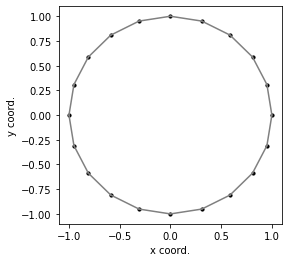

In [9]:
Q = X.copy()
# plot nodes with matplotlib
plt.subplots(figsize=(4,4))
plt.scatter(x=Q[:,0],y=Q[:,1], c='k', s=10)

# plot edges with matplotlib
for K in range(NK):
    nxl = []; nyl = [];
    for a in elements[K]:
        nxl.append(Q[a,0])
        nyl.append(Q[a,1])
        plt.plot(nxl,nyl, c='gray')
plt.xlabel('x coord.')
plt.ylabel('y coord.')
plt.show()

## define an explicit synchronous variational integrator (ESVI)

In [2]:
def spring_force(q1,q2,x0, k=1.):
    '''hookean spring force from position 1 to position 2'''
    d  = q2-q1
    x  = np.linalg.norm(d)
    hat= d/x
    return -1.*k * (x-x0) * hat

In [3]:
def pop(time_list):
    value = time_list[0]
    time_list.remove(value)
    return value

def _compute_next_time(K, t, stepsize):
    '''compute next time for element's evaluation'''
    return t + stepsize

In [4]:
def explicit_synchronous(Q, V, M, elements, X0, t0, tf, stepsize):
    #push all K finite elements into the queue at initial time t0
    queue = list()
    NK = elements.shape[0]
    tauK = M.copy()  
    for K in list(range(NK)):
        tauK[K] = t0
        queue.append((t0, K))
        # tK2     = t0 # _compute_time(K, t0, stepsize, num_steps)

    # initialize nodal times to initial time t0
    N = Q.shape[0]
    tau = t0+0.*Q[:,0]

    #iterate over the elements in time.  
    #do until priority queue is empty
    while len(queue) > 0:
        #extract next element
        t, K = pop(queue)
        if t<=tf:
            #synchronous time updates
            #update node positions
            Ka = elements[K]
            for a in Ka:
                Q[a] = Q[a] + V[a]*(t-tau[a])
            #update node times
            for a in Ka:
                tau[a] = t
        
            #compute the nodal force of the edge element
            x0 = X0[K]
            a1 = Ka[0]; a2 = Ka[1];
            q1 = Q[a1]; q2 = Q[a2];
            force = spring_force(q1,q2,x0, k=1.)
            #update node velocities
            V[a1] = V[a1] - ((t-tauK[K])/M[a1]) * force
            V[a2] = V[a2] + ((t-tauK[K])/M[a2]) * force
            #update element's time
            tauK[K] = t
            #compute next time for element's evaluation
            tKnext = t + stepsize #_compute_next_time(K, t, stepsize)
            #Schedule K for next update
            push( queue, (tKnext, K) )
    return Q, V, tau

##  perturbing with isotropic dilation

In [10]:
#reset the simulation to the initial perturbation
Q = 1.1*X
V = 0.*X

In [11]:
#precompute equilibrium config in terms of initial edge lengths, X0
X0 = 0.*np.array(range(NK), dtype=np.float)
for K in range(NK):
    al = elements[K]
    q  = X[al]
    q1 = q[0] #the first nodal coordinate of the edge
    q2 = q[1] #the second nodal coordinate of the edge
    d = q2-q1
    X0[K] = np.linalg.norm(d)

In [12]:
# #DONE: for each edge element, compute the nodal forces
# K = 12
# x0 = X0[K]
# Ka = elements[K]
# a1 = Ka[0]; a2 = Ka[1];
# q1 = Q[a1]; q2 = Q[a2]; 
# # q  = Q[al]
# # q1 = q[0] #the first nodal coordinate of the edge
# # q2 = q[1] #the second nodal coordinate of the edge
# force = spring_force(q1,q2,x0, k=1.)
# #update node velocities 
# # V[a] = V[a] - ((t-tauK[K])/M[a])

In [13]:
#TODO: simplify the explicit AVI algorithm for here
t0 = 0.
tf = 1.
stepsize = 0.1
#more args
#elements, Q, V, M, stepsize
Q, V, tau = explicit_synchronous(Q, V, M, elements, X0, t0, tf, stepsize)
print('nodal times are = ')
print(tau)
#assert all nodes ended up at time tf
assert ( np.isclose(tau,tf, rtol=1e-05, atol=1e-08).all() ) 

nodal times are = 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


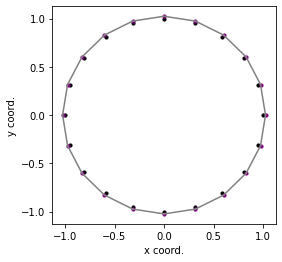

In [14]:
#plot the results of time integration
# plot nodes with matplotlib
plt.subplots(figsize=(4,4))
plt.scatter(x=X[:,0],y=X[:,1], c='k', s=10)
plt.scatter(x=Q[:,0],y=Q[:,1], c='purple', s=10)

# plot edges with matplotlib
for K in range(NK):
    nxl = []; nyl = [];
    for a in elements[K]:
        nxl.append(Q[a,0])
        nyl.append(Q[a,1])
        plt.plot(nxl,nyl, c='gray')
plt.xlabel('x coord.')
plt.ylabel('y coord.')
plt.show()

# define measures of instantaneous volume and energy 

In [15]:
#measure the area of one element
origin = np.array([0.,0.])

K  = 12
Ka = elements[K]
a1 = Ka[0]; a2 = Ka[1];
q1 = Q[a1]; q2 = Q[a2]; 

def area_of_triangle(q1,q2,origin):
    return np.cross(q1-origin,q2-origin)/2.
    #     return np.linalg.norm(np.cross(q1-origin,q2-origin))/2.

area_of_triangle(q1,q2,origin)

0.1619743750072717

In [16]:
#compute the area of the mesh
area = 0.
for K in range(NK):
    Ka = elements[K]
    a1 = Ka[0]; a2 = Ka[1];
    q1 = Q[a1]; q2 = Q[a2]; 
    area += area_of_triangle(q1,q2,origin)
print(f'the area of the mesh is currently {area}.')

the area of the mesh is currently 3.2394875001454353.


In [17]:
def energy_of_edge(q1,q2,v1,v2,m1,m2,x0,k=1.):
    '''define the energy of a single edge element to be the sum of half of the energy of either of its two nodes.'''
    energy = 0.
    # kinetic energy of nodes
    energy += np.dot(v1,v1) * m1 / 2.
    energy += np.dot(v2,v2) * m2 / 2.
    # potential energy of nodes
    energy += 2. * (np.linalg.norm(q2-q1)-x0) ** 2 * k / 2.
    energy /= 2.
    return energy

In [18]:
#measure the total mechanical energy of one element
K  = 12
Ka = elements[K]
a1 = Ka[0]; a2 = Ka[1];
q1 = Q[a1]; q2 = Q[a2]; 
v1 = V[a1]; v2 = V[a2]; 
m1 = M[a1]; m2 = M[a2]; 
x0 = X0[K]
energy_of_edge(q1,q2,v1,v2,m1,m2,x0,k=1.)

0.0005055874267719474

In [19]:
#measure the total mechanical energy of the entire mesh
energy = 0.
for K in range(NK):
    Ka = elements[K]
    a1 = Ka[0]; a2 = Ka[1];
    q1 = Q[a1]; q2 = Q[a2]; 
    v1 = V[a1]; v2 = V[a2]; 
    m1 = M[a1]; m2 = M[a2]; 
    x0 = X0[K]
    energy += energy_of_edge(q1,q2,v1,v2,m1,m2,x0,k=1.)
print(f'the energy of the mesh is currently {energy}.')

the energy of the mesh is currently 0.010111748535438976.


In [20]:
#measure the perimeter of the mesh
perimeter = 0.
for K in range(NK):
    al = elements[K]
    q  = Q[al]
    q1 = q[0] #the first nodal coordinate of the edge
    q2 = q[1] #the second nodal coordinate of the edge
    perimeter += np.linalg.norm(q2-q1)
print(f'the perimeter of the mesh is currently {perimeter}.')    

the perimeter of the mesh is currently 6.406774006620596.


In [21]:
perimeter_to_area_ratio = perimeter/area
print(f'the perimeter_to_area_ratio of the mesh is currently {perimeter_to_area_ratio}.')  

square_perimeter_to_area_ratio = perimeter**2/area
print(f'the perimeter_to_area_ratio of the mesh is currently {square_perimeter_to_area_ratio}.')  
print(f'compare to 4π = {4*np.pi}.')  

the perimeter_to_area_ratio of the mesh is currently 1.9777122172358952.
the perimeter_to_area_ratio of the mesh is currently 12.670755225962917.
compare to 4π = 12.566370614359172.


In [22]:
def get_measures(Q, V, M, elements, X0, k=1.):
    '''returns the total mechanical energy, perimeter, and area of the entire 2D mesh
    energy, area, perimeter = get_measures(elements, Q, V, M, X0, k=1.)
    '''
    origin = np.array([0.,0.])
    perimeter = 0.
    energy = 0.
    area = 0.
    NK = elements.shape[0]
    for K in range(NK):
        Ka = elements[K]
        a1 = Ka[0]; a2 = Ka[1];
        q1 = Q[a1]; q2 = Q[a2]; 
        v1 = V[a1]; v2 = V[a2]; 
        m1 = M[a1]; m2 = M[a2]; 
        x0 = X0[K]
        energy    += energy_of_edge(q1,q2,v1,v2,m1,m2,x0,k=k)
        area      += area_of_triangle(q1,q2,origin)
        perimeter += np.linalg.norm(q2-q1)
    return energy, area, perimeter

In [23]:
energy, area, perimeter = get_measures(Q, V, M, elements, X0, k=1.)

def print_measures(energy, area, perimeter):
    print(f'the area of the mesh is currently {energy}.')
    print(f'the perimeter of the mesh is currently {perimeter}.')    
    perimeter_to_area_ratio = perimeter/area
    print(f'the perimeter_to_area_ratio of the mesh is currently {perimeter_to_area_ratio}.')  
    square_perimeter_to_area_ratio = perimeter**2/area
    print(f'the perimeter_to_area_ratio of the mesh is currently {square_perimeter_to_area_ratio}.')  
    print(f'compare perimeter_to_area_ratio to that of a circle 4π = {4*np.pi}.')
    return square_perimeter_to_area_ratio
print_measures(energy, area, perimeter)

the area of the mesh is currently 0.010111748535438976.
the perimeter of the mesh is currently 6.406774006620596.
the perimeter_to_area_ratio of the mesh is currently 1.9777122172358952.
the perimeter_to_area_ratio of the mesh is currently 12.670755225962917.
compare perimeter_to_area_ratio to that of a circle 4π = 12.566370614359172.


12.670755225962917

# visualize system measures over time for the ESVI perturbed with isotropic dilation

consider taking the initial configuration to be a dilation of the equilibrium configuration.

$$\vec{x}_a(t=0,a) \propto X_a $$


also consider the initial system to be at rest
$$\vec{v}(t=0,a) = \vec{0} $$

**result**, energy is conserved to 2 significant figures, and buckling occurs at around time $t=60$ for a stepsize of $h = 0.01$

- DONE: plot ^these measures over time.  Do they look reasonable?  For a brief time, year.  Can I make a nice Fig. 1B/C with them?  They could make a potential contribution...
     - E should be constant for all perturbations. It's not for ESVI.
     - P**2/A should also be constant for all isotropic perturbations
     - A and/or P/A might provide an analytical check for "nice" perturbations.  P^2/A is well conserved numerically.

In [24]:
#reset the simulation to the initial perturbation
Q = 1.1*X
V = 0.*X
t = 0.

#get initial measures
energy0, area0, perimeter0 = get_measures(Q, V, M, elements, X0, k=1.)

# define the constant synchronous stepsizes and the stopping time
tf = 60.
stepsize = 0.01

In [25]:
energy_lst = []; area_lst = []; perimeter_lst = []; t_lst = []
while t<tf:
    #forward integrate in time
    Q, V, tau = explicit_synchronous(Q, V, M, elements, X0, t0=t, tf=t+stepsize, stepsize=stepsize)
    #update time, rounding to 15 digits because of floating point error
    t = np.around(np.mean(tau),15)
    #measure/record extrinsic system values
    energy, area, perimeter = get_measures(Q, V, M, elements, X0, k=1.)
    energy_lst.append(energy)
    area_lst.append(area)
    perimeter_lst.append(perimeter)
    t_lst.append(t)

In [26]:
#format results as a pandas.DataFrame
df = pd.DataFrame({'t':t_lst, 'energy':energy_lst, 'area':area_lst, 'perimeter':perimeter_lst})
#compute intrinsic measures
df['perimeter_to_area_ratio']   = df['perimeter']/df['area']
df['square_perimeter_to_area_ratio'] = df['perimeter']**2/df['area']

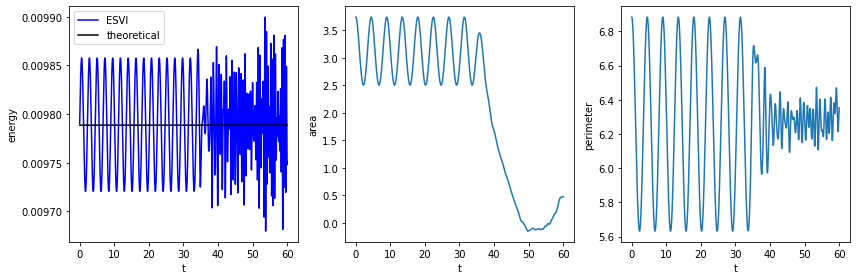

In [27]:
#plot the extrinsic measures
fig, axs = plt.subplots(ncols = 3, figsize = (12,4))

#plot energy versus time, t
ax = axs[0]
x_values = df['t']
y_values = df['energy']
ax.plot(x_values,y_values, 'b', label='ESVI')
ax.plot(x_values,energy0+0.*y_values, 'k',label='theoretical')
ax.set_xlabel('t')
ax.legend()
ax.set_ylabel('energy')

#plot area versus time, t
ax = axs[1]
x_values = df['t']
y_values = df['area']
ax.plot(x_values,y_values)
ax.set_xlabel('t')
ax.set_ylabel('area')

#plot perimeter versus time, t
ax = axs[2]
x_values = df['t']
y_values = df['perimeter']
ax.plot(x_values,y_values)
ax.set_xlabel('t')
ax.set_ylabel('perimeter')

plt.tight_layout()
plt.show()

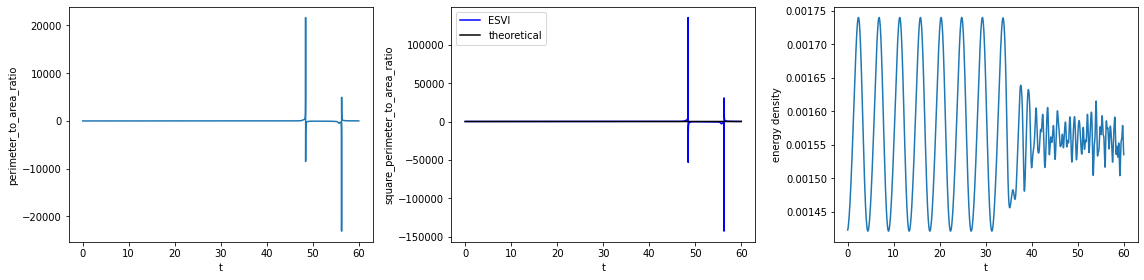

In [488]:
#plot the intrinsic measures
fig, axs = plt.subplots(ncols = 3, figsize = (16,4))

#plot  versus time, t
ax = axs[0]
x_values = df['t']
y_values = df['perimeter_to_area_ratio']
ax.plot(x_values,y_values)
ax.set_xlabel('t')
ax.set_ylabel('perimeter_to_area_ratio')

#plot area versus time, t
ax = axs[1]
x_values = df['t']
y_values = df['square_perimeter_to_area_ratio']
ax.plot(x_values,y_values, 'b', label='ESVI')
ax.plot(x_values,4*np.pi+0.*y_values, 'k',label='theoretical')
ax.set_xlabel('t')
ax.legend()
ax.set_ylabel('square_perimeter_to_area_ratio')

#plot perimeter versus time, t
ax = axs[2]
x_values = df['t']
y_values = df['energy']/df['perimeter']#**2
ax.plot(x_values,y_values)
ax.set_xlabel('t')
ax.set_ylabel('energy density')

plt.tight_layout()
plt.show()

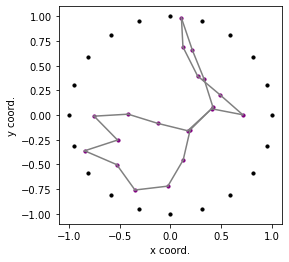

In [489]:
#plot the results of time integration
# plot nodes with matplotlib
plt.subplots(figsize=(4,4))
plt.scatter(x=X[:,0],y=X[:,1], c='k', s=10)
plt.scatter(x=Q[:,0],y=Q[:,1], c='purple', s=10)

# plot edges with matplotlib
for K in range(NK):
    nxl = []; nyl = [];
    for a in elements[K]:
        nxl.append(Q[a,0])
        nyl.append(Q[a,1])
        plt.plot(nxl,nyl, c='gray')
plt.xlabel('x coord.')
plt.ylabel('y coord.')
plt.show()

# visualize system measures over time for the ESVI perturbed with a horizontal stretching

consider taking the initial configuration to be the equilibrium configuration.
$$\vec{x}_a(t=0,a) = X_a $$

consider the initial velocity in the x direction to be proportional to the initial x coordinate
$$v_x(t=0,a) \propto x(t=0,a)$$

In [539]:
#reset the simulation to the initial perturbation
vscale = .1 #unit length / unit time
Q = X.copy()
V = 0.*X
V[:,0] = vscale*Q[:,0]
t = 0.

In [540]:
#get initial measures
energy0, area0, perimeter0 = get_measures(Q, V, M, elements, X0, k=1.)

# define the constant synchronous stepsizes and the stopping time
tf = 60.
stepsize = 0.01

In [541]:
energy_lst = []; area_lst = []; perimeter_lst = []; t_lst = []
while t<tf:
    #forward integrate in time
    Q, V, tau = explicit_synchronous(Q, V, M, elements, X0, t0=t, tf=t+stepsize, stepsize=stepsize)
    #update time, rounding to 15 digits because of floating point error
    t = np.around(np.mean(tau),15)
    #measure/record extrinsic system values
    energy, area, perimeter = get_measures(Q, V, M, elements, X0, k=1.)
    energy_lst.append(energy)
    area_lst.append(area)
    perimeter_lst.append(perimeter)
    t_lst.append(t)

In [542]:
#format results as a pandas.DataFrame
df = pd.DataFrame({'t':t_lst, 'energy':energy_lst, 'area':area_lst, 'perimeter':perimeter_lst})
#compute intrinsic measures
df['perimeter_to_area_ratio']   = df['perimeter']/df['area']
df['square_perimeter_to_area_ratio'] = df['perimeter']**2/df['area']

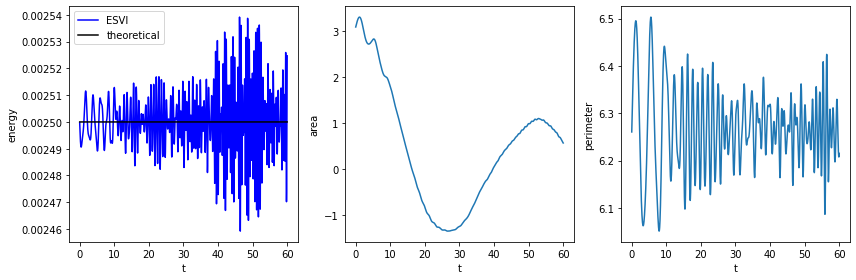

In [543]:
#plot the extrinsic measures
fig, axs = plt.subplots(ncols = 3, figsize = (12,4))

#plot energy versus time, t
ax = axs[0]
x_values = df['t']
y_values = df['energy']
ax.plot(x_values,y_values, 'b', label='ESVI')
ax.plot(x_values,energy0+0.*y_values, 'k',label='theoretical')
ax.set_xlabel('t')
ax.legend()
ax.set_ylabel('energy')

#plot area versus time, t
ax = axs[1]
x_values = df['t']
y_values = df['area']
ax.plot(x_values,y_values)
ax.set_xlabel('t')
ax.set_ylabel('area')

#plot perimeter versus time, t
ax = axs[2]
x_values = df['t']
y_values = df['perimeter']
ax.plot(x_values,y_values)
ax.set_xlabel('t')
ax.set_ylabel('perimeter')

plt.tight_layout()
plt.show()

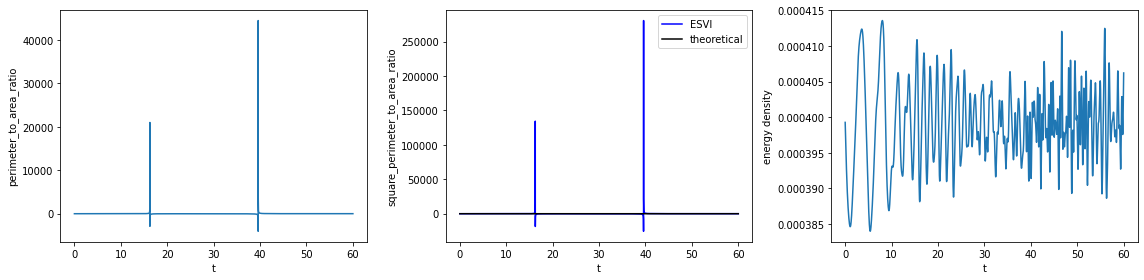

In [508]:
#plot the intrinsic measures
fig, axs = plt.subplots(ncols = 3, figsize = (16,4))

#plot  versus time, t
ax = axs[0]
x_values = df['t']
y_values = df['perimeter_to_area_ratio']
ax.plot(x_values,y_values)
ax.set_xlabel('t')
ax.set_ylabel('perimeter_to_area_ratio')

#plot area versus time, t
ax = axs[1]
x_values = df['t']
y_values = df['square_perimeter_to_area_ratio']
ax.plot(x_values,y_values, 'b', label='ESVI')
ax.plot(x_values,4*np.pi+0.*y_values, 'k',label='theoretical')
ax.set_xlabel('t')
ax.legend()
ax.set_ylabel('square_perimeter_to_area_ratio')

#plot perimeter versus time, t
ax = axs[2]
x_values = df['t']
y_values = df['energy']/df['perimeter']#**2
ax.plot(x_values,y_values)
ax.set_xlabel('t')
ax.set_ylabel('energy density')

plt.tight_layout()
plt.show()

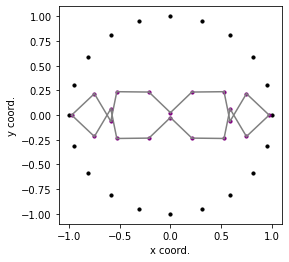

In [509]:
#plot the results of time integration
# plot nodes with matplotlib
plt.subplots(figsize=(4,4))
plt.scatter(x=X[:,0],y=X[:,1], c='k', s=10)
plt.scatter(x=Q[:,0],y=Q[:,1], c='purple', s=10)

# plot edges with matplotlib
for K in range(NK):
    nxl = []; nyl = [];
    for a in elements[K]:
        nxl.append(Q[a,0])
        nyl.append(Q[a,1])
        plt.plot(nxl,nyl, c='gray')
plt.xlabel('x coord.')
plt.ylabel('y coord.')
plt.show()

# measure the energy defect as a function of the constant stepsize

In [28]:
#reset the simulation to the initial perturbation
vscale = 1.#.1 #unit length / unit time
Q = X.copy()
V = 0.*X
V[:,0] = vscale*Q[:,0]
t = 0.

In [29]:
#get initial measures
energy0, area0, perimeter0 = get_measures(Q, V, M, elements, X0, k=1.)

# define the constant synchronous stepsizes and the stopping time
tf = 60.
stepsize = 0.01

In [30]:
#initialize EK as the list of initial energies where EK[K] is the Kth element
EK = 0.*X0
for K in range(NK):
    #compute the energy of the Kth element
    Ka = elements[K]
    a1 = Ka[0]; a2 = Ka[1];
    q1 = Q[a1]; q2 = Q[a2]; 
    v1 = V[a1]; v2 = V[a2]; 
    m1 = M[a1]; m2 = M[a2]; 
    x0 = X0[K]
    EK[K] = energy_of_edge(q1,q2,v1,v2,m1,m2,x0,k=1.)
#compute the total initial energy
E_total = np.sum(EK)

In [31]:
def get_energies(Q, V, M, elements, X0, k=1.):
    '''get energy of system.
    functionally get the energy defect for a given change to the system = (Q, V, M, elements, X0)'''
    EK_next = 0.*X0
    for K in range(NK):
        #compute the energy of the Kth element
        Ka = elements[K]
        a1 = Ka[0]; a2 = Ka[1];
        q1 = Q[a1]; q2 = Q[a2]; 
        v1 = V[a1]; v2 = V[a2]; 
        m1 = M[a1]; m2 = M[a2]; 
        x0 = X0[K]
        EK_next[K] = energy_of_edge(q1,q2,v1,v2,m1,m2,x0,k=1.)
    return EK_next

In [32]:
#integrate in time by one step of duration, stepsize
Q_new, V_new, tau_new = explicit_synchronous(Q.copy(), V.copy(), M.copy(), elements, X0, t0=0, tf=stepsize, stepsize=stepsize)
EK_next = get_energies(Q, V, M, elements, X0, k=1.)
E_defect = np.abs(EK_next - EK)
E_total_next = np.sum(EK_next)
E_total_defect = E_defect
#get energy defect
E_defect = EK_next - EK
var_E_defect = np.var(np.abs(E_defect))
mean_E_defect = np.mean(np.abs(E_defect))

#print energy defect measures
print(E_total_next)
# print(E_total_defect)
print(f"The mean change in energy per element is {mean_E_defect} ± {var_E_defect} unit energy.")

0.24999999999999997
The mean change in energy per element is 0.0 ± 0.0 unit energy.


In [33]:
#update the old values with the new values
E_total = E_total_next
Q = Q_new.copy()
V = V_new.copy()
tau = tau_new.copy()

In [34]:
def get_avg_energy_defect_for_one_step(stepsize, Q, V, M, elements, X0, k=1.):
    '''compute the mean±var energy_defect for a given stepsize functionally.
    returns mean_E_defect, var_E_defect.'''
    #get the old energies
    EK = get_energies(Q, V, M, elements, X0, k=1.)
    #integrate in time by one step of duration, stepsize
    Q_new, V_new, tau_new = explicit_synchronous(Q.copy(), V.copy(), M.copy(), elements, X0, t0=0, tf=stepsize, stepsize=stepsize)
    #get the new energies
    EK_next = get_energies(Q_new, V_new, M, elements, X0, k=1.)
    E_defect = EK_next - EK
    var_E_defect = np.var(np.abs(E_defect))
    mean_E_defect = np.mean(np.abs(E_defect))
    return mean_E_defect, var_E_defect

## compute/save/plot the energy defect, ∆E, versus stepsize, h for perturbations #1, #2, and #3

In [114]:
# #reset the simulation to the initial perturbation #1
# vscale = 500
# Q = vscale*X
# V = 0.*X
# t = 0.

# #reset the simulation to the initial perturbation #2
# vscale = .1#.1 #unit length / unit time
# Q = X.copy()
# V = 0.*X
# V[:,0] = vscale*Q[:,0]
# t = 0.

#reset the simulation to the initial perturbation #3
vscale = 0.001 #unit length / unit time
Q = X.copy()
V = 0.*X
V[:,0] = vscale*Q[:,0]
V[:,1] = -vscale*Q[:,1]
t = 0.

#define a range of stepsizes
h_array = np.logspace(-5,1.,num = 10**4)

#compute the mean±var energy_defect for a range of stepsizes
mean_energy_defect_lst = []; var_energy_defect_lst = [];
for stepsize in h_array:
    #compute the mean±var energy_defect for a given stepsize functionally.
    mean_E_defect, var_E_defect = get_avg_energy_defect_for_one_step(stepsize, Q, V, M, elements, X0, k=1.)
    mean_energy_defect_lst.append(mean_E_defect)
    var_energy_defect_lst.append(var_E_defect)
    #     print((stepsize,mean_E_defect, var_E_defect))

In [115]:
#format results as a pandas.DataFrame
df = pd.DataFrame({'h':h_array, 'mean_E_defect':mean_energy_defect_lst, 'var_E_defect':var_energy_defect_lst})

In [116]:
#save .csv for this vscale
os.chdir(nb_dir.replace('/nb','/data'))
df.to_csv(f'E_defect_versus_h_ESVI_vscale_{vscale}.csv',index=False)
beep(3)

#define values to be plotted
x_values                = df['h'].values
y_values =    df['mean_E_defect'].values
y_err_values = df['var_E_defect'].values

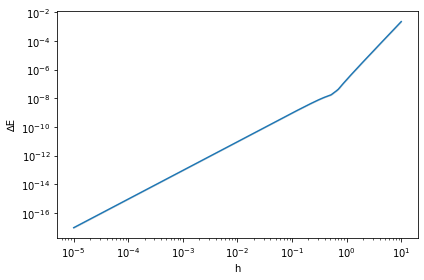

In [117]:
#plot the extrinsic measures
fig, ax = plt.subplots(ncols = 1, figsize = (6,4))

#plot energy versus time, t
ax.plot(x_values,y_values, '-', 'gray', label='ESVI')
ax.fill_between(x_values,y_values - y_err_values, y_values + y_err_values,
                 color='gray', alpha=0.2)

# ax.plot(x_values,y_err_values, 'b')
# ax.plot(x_values,energy0+0.*y_values, 'k',label='theoretical')
ax.set_xlabel('h')
# ax.legend()
ax.set_ylabel('∆E')
ax.set_xscale('log')
ax.set_yscale('log')

plt.tight_layout()
plt.show()

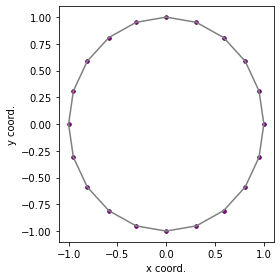

In [120]:
#plot the results of time integration
# plot nodes with matplotlib
plt.subplots(figsize=(4,4))
plt.scatter(x=X[:,0],y=X[:,1], c='k', s=10)
plt.scatter(x=Q[:,0],y=Q[:,1], c='purple', s=10)

# plot edges with matplotlib
for K in range(NK):
    nxl = []; nyl = [];
    for a in elements[K]:
        nxl.append(Q[a,0])
        nyl.append(Q[a,1])
        plt.plot(nxl,nyl, c='gray')
plt.xlabel('x coord.')
plt.ylabel('y coord.')
plt.tight_layout()
plt.show()

In [119]:
#DONE: format ^that plot to show the 1sigma error bars
#DONE: define a range of perturbation magnitudes
#DONE: compute ^this data for variable perturbation magnitude
#DONE: repeat ^this analysis for perturbation #1
#DONE: repeat ^this analysis for perturbation #3

#TODO(later): vary the number of elements, NK

# TODO: choose asynchronous time steps that explicitely conserve energy/momentum
- is energy/momentum conserved?
- does buckling still happen?
- does buckling happen any less?

- TODO(pen and paper work): vary the world lines of particles to conserve both energy and momentum for each element update.

- TODO: consider asynchronous time steps/more time steps/adaptive time steps
- TODO: consider adding a pressure force meant to conserve area
- TODO: consider adding dissapation
- TODO(later): visualize the position/configuration time series
- TODO(later): write a synchronize_system function that takes tau/tauK and returns the (Q, V) of the mesh interpolated to the desired time, t

# TODO: simplest adaptive time stepping routine to conserve energy within a specified tolerance

- first consider determining if ∆E/E_0 has all these curves landing on eachother
    - TODO(will take at least 20 min of flow state work): compute the initial energies. record.  compute ∆E/E_0 for the yaxis. plot all values and see which trials land on comparable curves
if ^that seems relatively universal, then consider the approximation

$$ln(h)\propto ln(\Delta E/E_0)$$
or 
$$h \approx ln(\Delta E/E_0)$$

In [121]:
#TODO: make a simplest adaptive time stepping routine.
#TODO(maybe): consider perturbation #3 (which is loosely volume conserving?)
#TODO(maybe): make a hypothesis/back-of-envelop-estimate on the energy versus time for some adaptive time stepping routine
#TODO: observe the effects of some adaptive time stepping routine

# TODO: simplest IMR for time stepping one element
- some implicit solve is necessary to get quality results!
<br><br><br>
- is energy/momentum conserved?
- does buckling still happen?
- does buckling happen any less?

## type down the equations for an implicit integrator from the papers here

the discrete d'Alembert Labrange equation from `KamaOrWe2000.pdf` is (Eqn. 5.4)

$$
\frac{1}{h}(-q_{k+2}+2q_{k+1}-q_{k}) + \frac{h}{2}(1-\alpha)a_{k+1+\alpha} + \frac{h}{2} \alpha a_{k+2-\alpha} + \frac{h}{2}\alpha a_{k+\alpha} + \frac{h}{2}(1-\alpha)a_{k+1-\alpha} + \frac{h}{2}F\Big(\frac{q_{k+2}-q_{k+1}}{h}\Big) + \frac{h}{2}F\Big(\frac{q_{k+1}-q_k}{h}\Big)=0
$$

^this integrator is second order accurate for all $\alpha$.  It considers Lagrangians of the form $L = (1/2)\dot{q}^TM\dot{q}-V(q)$ with an arbitrary nonconservative force $F=F(\dot{q})$.  It assumes constant time steps.

Where $a_k = M^{-1}(-\nabla V(q_k))$ and $q_{k+\alpha} = (1-\alpha)q_k + \alpha q_{k+1}$.


## the generalized explicit trapezoidal rule
- does not assume constant step sizes
- doesn't appear to need modicifaction to 

- but is it symplectic??

In [122]:
from scipy import optimize

In [128]:
# optimize.basinhopping?
# optimize.brent?
# optimize.fsolve?
# optimize.minpack.fsolve?
optimize.toms748?

In [130]:
import jax

In [141]:
# jax.value_and_grad?
jax.remat?

In [142]:
jax.hessian?

In [154]:
jax.grad?